- author: Eric Lin
- date: 2023-12-18 15:00
- title: Pelican 架站攻略
- slug: build-a-pelican-blog-on-your-own
- tags: 資料科學, data-science, 日誌
- description: Pelican 是一個用 Python 寫的靜態網頁生成器, 可以幫我們把 reStructedText, Markdown file 甚至 Jupyer notebook 轉成靜態的 HTML 檔案。 有些人可能已經注意到這個部落格是用 Pelican 所寫成並且 host 在 Github 上的。這篇主要紀錄如何使用 Jinja2 自訂主題。
- summary: Pelican 是一個用 Python 寫的靜態網頁生成器, 可以幫我們把 reStructedText, Markdown file 甚至 Jupyer notebook 轉成靜態的 HTML 檔案。 有些人可能已經注意到這個部落格是用 Pelican 所寫成並且 host 在 Github 上的。這篇主要紀錄如何使用 Jinja2 自訂主題。
- image: brennan-burling-oCyMED0yyck-unsplash.jpg
- image_credit_url: https://unsplash.com/photos/grayscale-photography-of-person-holding-computer-mouse-near-keyboard-and-mug-6PF6DaiWz48

## Pelican Quickstart

這篇文章主要是記錄如何運用 [Pelican](https://docs.getpelican.com/en/latest/quickstart.html) 建立一個部落格，並且 host 在 [Github](https://github.com/Ericlinyuting/Ericlinyuting.Blog)上，最後則是使用 [Jinja2](https://jinja.palletsprojects.com/en/3.0.x/templates/) 繼承與套用自訂主題。

Pelican 是一個使用 Python 撰寫的靜態網頁生成器，它能夠將 Markdown 檔案甚至[Jupyer notebook](http://jupyter.org/)轉換為靜態的 HTML 檔案。靜態網頁的優勢在於無需使用雲端伺服器(web server)或資料庫(Database)管理內容，只需將 HTML 檔案放置在所需的位置，例如[Github Pages](https://pages.github.com/)。以Pelican 的官方介紹總結：

>Pelican is a static site generator, written in Python, that requires no database or server-side logic. - Pelican Blog

關於如何使用Pelicand快速架一個屬於自己的部落格，首先點擊 [Pelican Quickstart](https://github.com/getpelican/pelican/blob/master/docs/quickstart.rst)。 並建立虛擬環境（virtualenv、pyenv或aconda等）下安裝Pelican並執行，接著就會出現一些設定的資訊。

``` text
Where do you want to create your new web site? [.]
What will be the title of this web site? EricLin's Blog
Who will be the author of this web site? EricLin
What will be the default language of this web site? [en]
Do you want to specify a URL prefix? e.g., https://example.com   (Y/n) n
Do you want to enable article pagination? (Y/n)
How many articles per page do you want? [10]
What is your time zone? [Europe/Paris] Asia/Taipei
Do you want to generate a tasks.py/Makefile to automate generation and publishing? (Y/n)
Do you want to upload your website using FTP? (y/N)
Do you want to upload your website using SSH? (y/N)
Do you want to upload your website using Dropbox? (y/N)
Do you want to upload your website using S3? (y/N)
Do you want to upload your website using Rackspace Cloud Files? (y/N)
Do you want to upload your website using GitHub Pages? (y/N)
``` 

其實阿上面的資訊後續都開到pelicanconf.py中進行修改，若為求方便快速可以按上上面提供的方式輸入即可。  
接著，在終端機中輸入 `pelican -r -l` 即可啟動專案，並於終端機的提示中點選http://127.0.0.1:8000 就可以在local端成功部署專案，
並可以在任意瀏覽器中開啟pelican所預設的部落格的首頁。  
到這裡你已經成功80%了!!!!

Jinja2 是 Python 知名的模組引擎 (templating engine)，可以有系統地產生 HTML，很常出現在 [Flask](http://flask.pocoo.org/) 或是 [Django](https://www.djangoproject.com/) Apps 裡頭。以下介紹在建立 Pelican blog 時常用到的功能。

## Github Page 部署

如果你剛剛有成功在local端部署一次pelican Blog，稍微仔細觀察一下，在專案目錄Output的資料夾中出現了`index.html`的檔案，是pelican自動生成的，驚不驚喜意不意外ＸＤＤ。如果有開發過網頁或是靜態的html，不難發現其實`index.html` 通常會作為網頁的landing page，所以其實要部署到github上，只需要將output這個資料夾以分支(branch)的形式傳到github repository中。
在Github上部署，不免俗的就是需要創建一個免費的github帳號，並建立一個Repository，Repository名稱為「xxx.github.io」或「xxx.github.com」。完成後透過`pip install ghp-import` 安裝[ghp-import](https://pypi.org/project/ghp-import/)的插件，並執行下面。(P.S.xxx要等於你的github帳號的username)
``` zsh
$ pelican content -o output -s pelicanconf.py
$ ghp-import output -b gh-pages
$ git push git@github.com:xxx/xxx.github.io.git gh-pages:master
```

最後，在repository的Settings中，點選左側Pages，並在右邊Branch的地方選擇master的Branch，按下發布就成功了！！

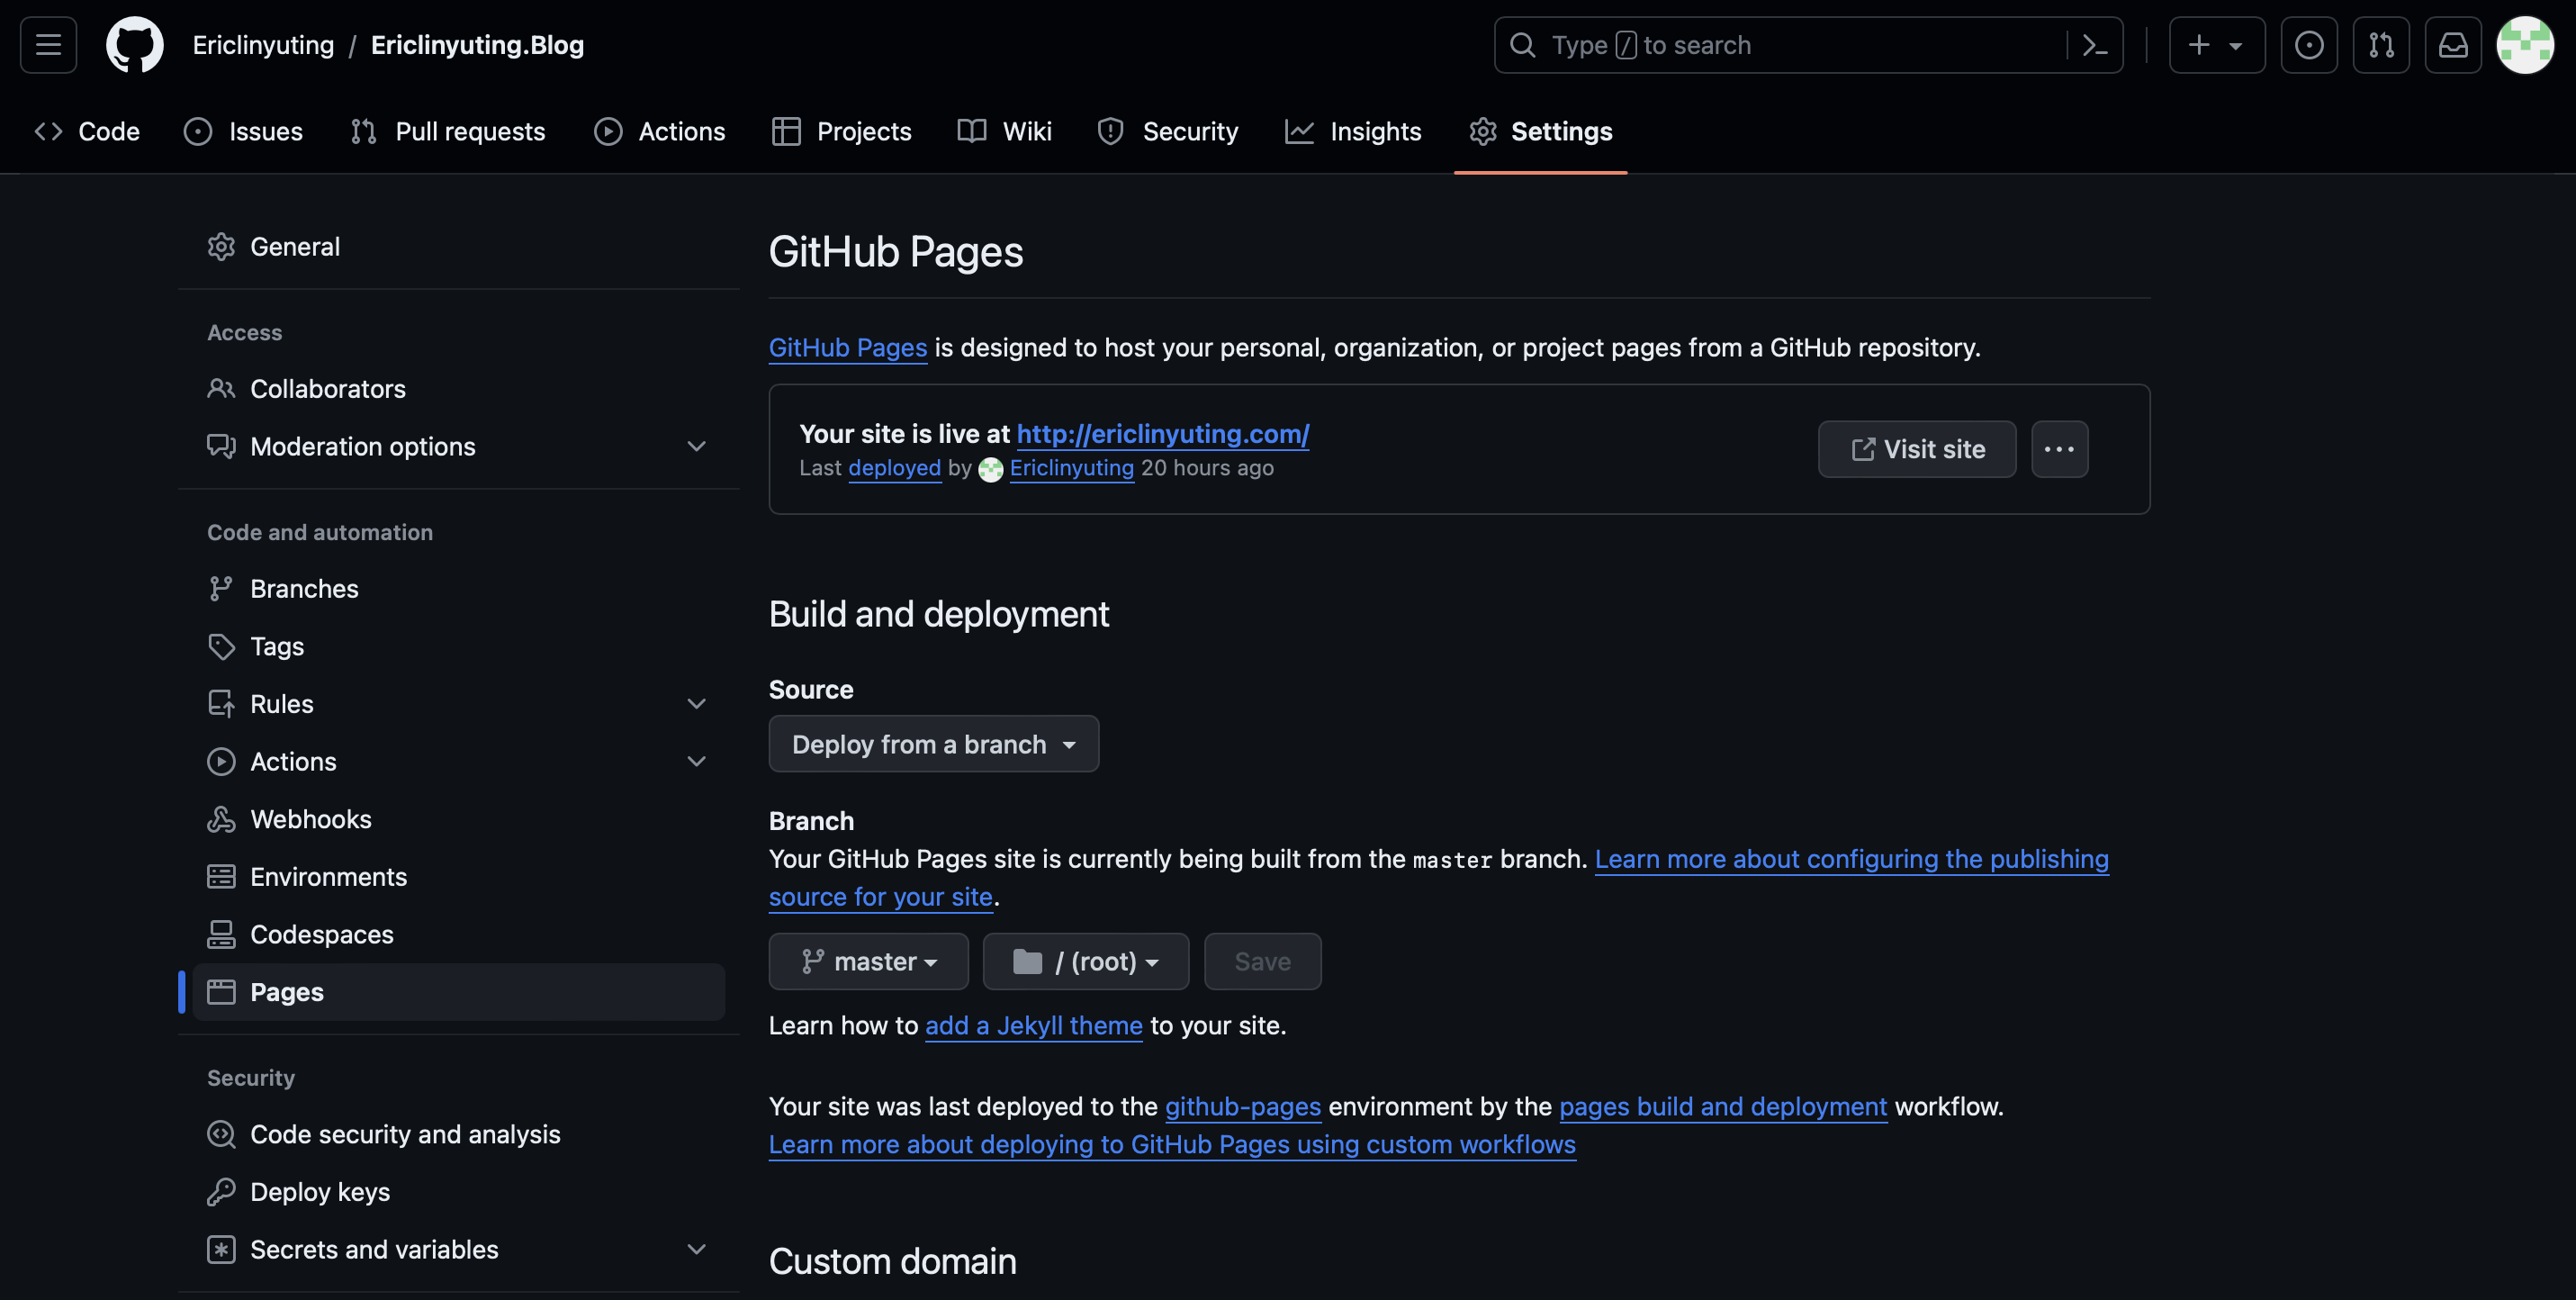

## Write Content

好了，到這裡，你至少已經會執行pelican的local專案，並將其部署到github上了。但到底要如何撰寫自己的內容呢？？？？
進入專案中，在content 目錄下建立一個 firstpost.md 的 markdown檔案，內容可以貼入以下(請自行修改)

```markdown
Title: My First Article
Date: 2023-11-21 10:20
Tags: personal, python
Category: misc
slug: my-first-article
Author: Eric Lin
template:article

Hello Pelican! This is my first Article.
```

完成後執行 `pelican content -o output -s pelicanconf.py` (重新生成output的html檔案) 或是重新整理 http://127.0.0.1:8000
(剛剛沒關的話XDD)，就可以在瀏覽器上輸入 http://127.0.0.1:8000/my-first-article 找到你剛才寫的內容了！

## Template

到這部，恭喜你已經學會如何建立一個很醜的pelican靜態網頁了XDD，那到底要如何套用客製化的Template呢？  
有兩個方法，一到官方的[pelican-Theme](https://pelicanthemes.com) 中挑一個一樣醜的Template XDD；而第二個則是到[StyleShout](https://styleshout.com) 找一個你喜歡的風格進行下載html檔案，而我是使用[Augustine](https://styleshout.com/free-templates/augustine/)。當然，若是前端高手，歡迎挑戰自行刻一個屬於自己的網頁。

值得注意的是，pelican 主題的套用要按照主題的套用要按照特定的格式安排，可以參考[Pelican Theme](https://docs.getpelican.com/en/latest/themes.html#structure)文件，將範本的html檔案整理成以下的架構
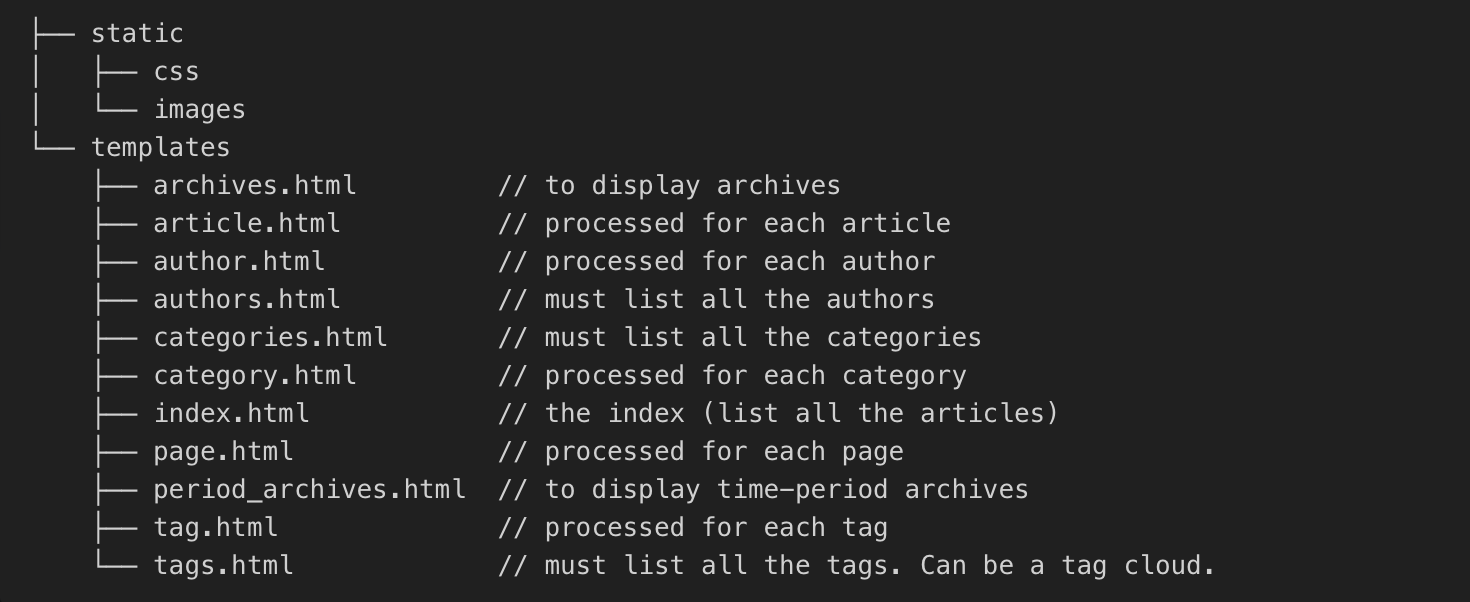

可以透過以下的指令，快速整理一下
``` zsh
mkdir static
mv inc/ static/
mv js/ static/
mv css/ static/
mv images/ static/
mkdir templates
mv *.html templates/
```

接個在部落格根目錄的`pelicanconf.py`中，加入
```python 
PATH = 'content'
THEME = "Augustine"
TIMEZONE = "Asia/Taipei"
DEFAULT_LANG = 'en'
```

完成後重新整理～～

此時你會發現似乎沒有按照你想的方式套用了正確的template檔案，這是因為我們正將`Augustine/templates/index.html` 輸出到output的資料夾中，然而卻沒有連同將引用的JS/CSS正確匯入，因此透過Jinja2的語法{{SITEURL}}，將各個將各個路徑改成`{{ SITEURL }}/theme/` ，如此就大功告成了，撒花～～

## Jinja2 brief Intrduce
### 再利用HTML

比方說我們可以建立一個汎用的 template base.html 來定義整個部落格共用的資訊，像是 header 裡頭要引入的 css / favicon，甚至是整體的排版等等：

```html
<!DOCTYPE html>
<html lang="en">
<head>
{% block head %}
    <link rel="stylesheet" type="text/css" href="css/vendor.css">
    <link rel="icon" href="images/favicon.ico" type="image/x-icon"/>
{% endblock head %}
</head>
<body>
    {% block content %}
        <p>部落格內容</p>
    {% endblock content %}
</body>    
```

注意到上面的 `{% block head %}` jinja2 語法。會在多個 HTML 檔案重複使用的部分我們可以用 `{% block BLOCKNAME %}` 以及 `{% endblock BLOCKNAME %}` 包起來，然後在獨立顯示一篇文章的 article.html 裡頭我們可以定義：

```python
{% extends "base.html" %}
{% block head %}
  {{ super() }}
  <title>文章標題</title>
{% endblock head %}
<body>
    {% block content %}
        <p>文章內容</p>
    {% endblock content %}
</body>
```


上面的 code 基本上是告訴 jinja2 article.html 要繼承 base.html 的所有內容，而在 `head` block 除了用`{{ super() }}` 繼承 base.html 的內容以外，在下面再追加新的內容(Title:文章標題)。而 `{% block content %}`則是完全取代裡面的內容。

因此最後 article.html 會被渲染成：

```html
<!DOCTYPE html>
<html lang="en">
<head>
    <link rel="stylesheet" type="text/css" href="css/vendor.css">
    <link rel="icon" href="images/favicon.ico" type="image/x-icon"/>
    <title>文章標題</title>
</head>
<body>
    <p>文章內容</p>
</body>
```

## Reference
- [Jinja2 Extension](https://jinja.palletsprojects.com/en/3.0.x/templates/)
- [Pelican 實戰手冊(主題篇)--LeeMeng](https://leemeng.tw/build-a-pelican-powered-blog-like-a-pro.html)
- [Pelican 教戰守策--BenKiller](https://benkiller.com/pelican-jiao-zhan-shou-ce.html)
- [Pelican Github](http://richohan.github.io/yong-pelican-github-pagejian-li-ge-ren-bu-luo-ge.html)